<a href="https://colab.research.google.com/github/abs711/ml-from-scratch/blob/main/LogisticRegression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [108]:
def accuracy(y_pred, y_test):
  return np.sum(y_pred==y_test)/len(y_test)

def ce_loss(y_pred,y):
  eps = 10**(-6)
  return -(y*np.log(y_pred+eps)+(1-y)*np.log(1-y_pred+eps)).mean()

def sigmoid(x):
  return (1/(1+np.exp(-x)))

class LogisticRegression:
  def __init__(self, lr = 0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None
    self.loss = []

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.random.rand(n_features)
    self.bias = np.random.rand(1)

    for _ in range(self.n_iters):
      linear_pred = np.dot(X, self.weights) + self.bias
      predictions = sigmoid(linear_pred)
      # print(predictions[:6])

      self.loss.append(ce_loss(predictions,y))

      dw = (1/n_samples)*np.dot(X.T, (predictions - y))
      db = (1/n_samples)*np.sum(predictions - y)

      self.weights = self.weights - self.lr*dw
      self.bias = self.bias - self.lr*db


  def predict(self,X):
    linear_pred = np.dot(X, self.weights) + self.bias
    predictions = sigmoid(linear_pred)
    class_pred = [0 if y<=0.5 else 1 for y in predictions]
    return class_pred



In [121]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

clf = LogisticRegression(lr=0.001)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


acc = accuracy(y_pred, y_test)

acc


<ipython-input-108-6155904a40b6>:9: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-x)))


0.9122807017543859

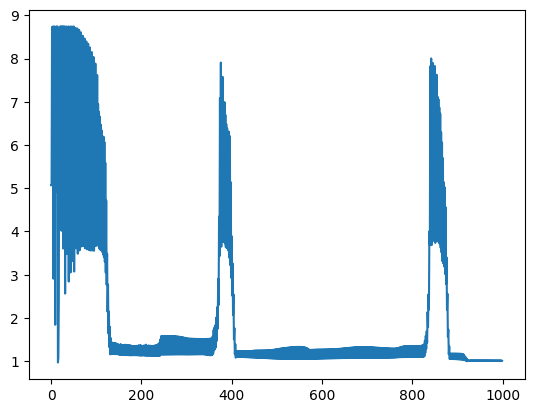

In [122]:
plt.plot(clf.loss)